In [690]:
# import all the necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [691]:
# Read Companies.txt
companies = pd.read_csv('companies.txt', sep="\t",encoding="ISO-8859-1")

In [692]:
# Read rounds2 csv
rounds2 = pd.read_csv('rounds2.csv', encoding="ISO-8859-1",index_col=None)

In [693]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [694]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


___Convert all companies permalink column to lower case & clear Junk Values___

In [695]:
companies.permalink = companies.permalink.str.lower()
companies.permalink = companies.permalink.str.encode('ISO-8859-1','ignore').str.decode('ascii','ignore')

___Check companies DF shape___

In [696]:
companies.shape

(66368, 10)

___Number of unique companies present in companies DF___

In [697]:
# Q1. How many unique companies are present in companies?
len(companies.permalink.unique())

66368

___Convert all rounds2 company permalink column to lower case & clear Junk Values___

In [698]:
rounds2.company_permalink = rounds2.company_permalink.str.lower()
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1','ignore').str.decode('ascii','ignore')

___Check rounds2 DF shape___

In [699]:
rounds2.shape

(114949, 6)

___Number of unique companies present in rounds2 DF___

In [700]:
# Q2. How many unique companies are present in rounds2?
len(rounds2.company_permalink.unique())

66368

___In the companies data frame, permalink column can be used as the unique key for each company___

___One observation from the number of unique companies list in rounds2 and companies DF is that, after clearing junks, both rounds2 DF and company DF has equal number of unique companies.___

__Rename permalink column in companies DF to company_permalink. So that merging on company_permalink column would be easy between rounds2 and companies df__

In [701]:
companies.rename(columns = {'permalink':'company_permalink'},inplace=True)

In [702]:
# Merge both data frames
master_frame = rounds2.merge(companies,on = 'company_permalink')

In [703]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [704]:
master_frame.shape

(114949, 15)

#  Funding Type Analysis

# Data Cleaning on master_frame

In [706]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [707]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


__Dropping NaN columns which are of not interest. funding_round_code, founded_at, city, region, state_code, homepage_url__

In [708]:
master_frame.drop(labels = 'funding_round_code', axis =1,inplace= True)
master_frame.drop(labels = 'founded_at', axis =1,inplace= True)
master_frame.drop(labels = 'city', axis =1,inplace= True)
master_frame.drop(labels = 'region', axis =1,inplace= True)
master_frame.drop(labels = 'state_code', axis =1,inplace= True)
master_frame.drop(labels = 'homepage_url', axis =1,inplace= True)

In [709]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
name                           1
category_list               3410
status                         0
country_code                8678
dtype: int64

__Removing all rows having raised_amount_usd as NULL values.__

In [710]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [711]:
master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
name                          1
category_list              1044
status                        0
country_code               5851
dtype: int64

__Removing all rows having category as NULL values.__

In [712]:
master_frame = master_frame[~master_frame.category_list.isnull()]

In [713]:
master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
name                          1
category_list                 0
status                        0
country_code               5386
dtype: int64

__Removing all rows having country_code as NULL values.__

In [714]:
master_frame = master_frame[~master_frame.country_code.isnull()]

In [715]:
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
name                       1
category_list              0
status                     0
country_code               0
dtype: int64

___After data cleaning up, new master DF___

In [716]:
# Take a copy for later plotting
master_frameCopy = master_frame
master_frame.shape

(88529, 9)

__As XYZ is only interested in venture, seed, angel, private_equity Investing type,
select only venture, seed, angel, private_equity Investing type in the master_frame.__

In [718]:
master_frame = master_frame.loc[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])]

In [719]:
master_frame.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

___Convert Funding amount in to Million USD for easier analysis___

In [720]:
master_frame.raised_amount_usd = master_frame.raised_amount_usd/1000000

In [721]:
# Q1. Average funding amount of venture type
# Q2. Average funding amount of angel type
# Q3. Average funding amount of seed type
# Q4. Average funding amount of private equity type
master_frame.groupby('funding_round_type').describe()

raised_amount_usd                                        \
                               count       mean         std  min       25%   
funding_round_type                                                           
angel                         4400.0   0.971574    7.710904  0.0  0.152756   
private_equity                1820.0  73.938486  201.776467  0.0  5.000000   
seed                         21095.0   0.747794    2.288318  0.0  0.068817   
venture                      47809.0  11.724223   88.215714  0.0  1.600000   

                                                        
                          50%        75%           max  
funding_round_type                                      
angel                0.414906   1.000000    494.511992  
private_equity      20.000000  75.762572   4745.460219  
seed                 0.300000   1.000000    200.000000  
venture              5.000000  12.000000  17600.000000

___The most representative value of the investment amount for each of the four funding types___

___venture             : 11.72 Million USD___

___Angel               : 0.97 Million USD___
 
___Seed                : 0.74 Million USD___

___Private equity : 73.93 Million USD___

___Based on XYZ's investment amount criteria, Venture is the most suitable investment type as its most representative value of investment amount falls in the range of 5 to 15 Million USD___

___Hence extracting only Venture Type Companies___

In [722]:
master_frame = master_frame[master_frame.funding_round_type == 'venture']

# Country analysis

In [723]:
# Let's create a DataFrame that contains all the country code of English Speaking Countries
country_code = {
    'country_name': ['Botswana', 'Cameroon', 'Ethiopia', 'Eritrea', 'Gambia', 'Ghana', 'Kenya', 'Lesotho', 'Liberia', 'Malawi', 'Mauritius', 'Namibia', 'Nigeria', 'Rwanda', 'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Uganda', 'Zambia','Zimbabwe', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Dominica', 'Grenada', 'Guyana', 'Jamaica', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States', 'India', 'Pakistan', 'Philippines', 'Singapore', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Federated States of Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Ireland', 'Malta', 'United Kingdom'],
    'code': ['BWA', 'CMR', 'ETH', 'ERI', 'GMB', 'GHA', 'KEN', 'LSO', 'LBR', 'MWI', 'MUS', 'NAM', 'NGA', 'RWA', 'SYC', 'SLE', 'ZAF', 'SSD', 'SDN', 'SWZ', 'TZA', 'UGA', 'ZMB', 'ZWE', 'ATG', 'BHS', 'BRB', 'BLZ', 'CAN', 'DMA', 'GRD', 'GUY', 'JAM', 'KNA', 'LCA', 'VCT', 'TTO', 'USA', 'IND', 'PAK', 'PHL', 'SGP', 'AUS', 'FJI', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'WSM', 'SLB', 'TON', 'TUV', 'VUT', 'IRL', 'MLT', 'GBR']
}
country_code_df = pd.DataFrame.from_dict(country_code)

In [724]:
country_code_df.head()

,country_name,code
0,Botswana,BWA
1,Cameroon,CMR
2,Ethiopia,ETH
3,Eritrea,ERI
4,Gambia,GMB


___Lets find how many unique countries are there for Venture type investment___

In [725]:
len(master_frame.country_code.unique())

97

___Since XYZ only wants to invest in countries that have their official language as 'English'___<br>
__Let's filter out the rows in master_frame based on that contraint__


In [726]:
# Remove all the non-English speaking countries
master_frame = master_frame[master_frame.country_code.isin(country_code_df.code)]

___Plotting total investment amount of Venture Type for all the English speaking countries___

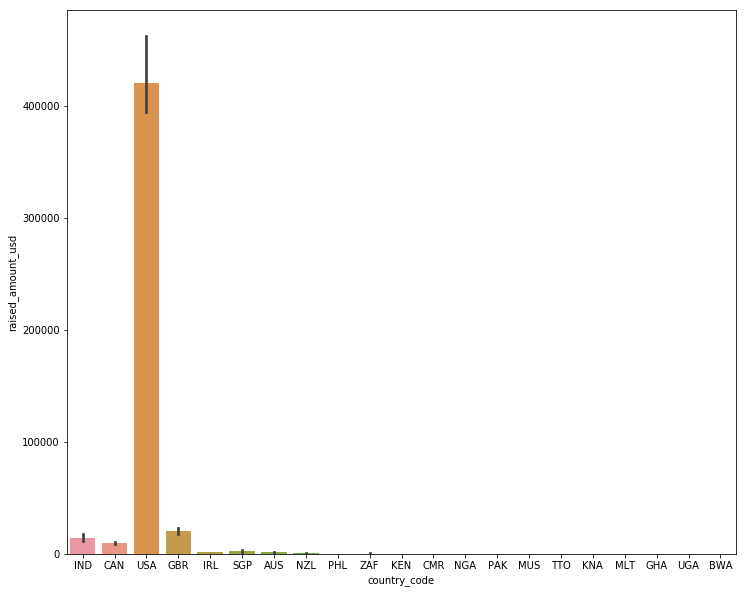

In [727]:
plt.figure(figsize=(12,10))
sns.barplot(master_frame.country_code,master_frame.raised_amount_usd,estimator = np.sum)
plt.show()

___From the above bar plot, we could see that USA, GBR and IND are the top three English speaking countries with highest total funcding across ALL sectors for the Venture investment type___

In [728]:
topcountries = master_frame.groupby('country_code',as_index= False).raised_amount_usd.sum().sort_values(by = 'raised_amount_usd',ascending = False).set_index('country_code',drop=True)

In [729]:
top9 = topcountries[0:9]
top9

,raised_amount_usd
country_code,
USA,420068.029342
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
SGP,2793.917856
IRL,1669.285543
AUS,1319.028698
NZL,448.316383
ZAF,233.713106


___From the at above table we can answer the following questions.___ <br><br>
__Q1. Top English speaking country__ <br>
-> USA<br>
__Q2. Second English speaking country__ <br>
-> GBR<br>
__Q3. Third English speaking country__ <br>
-> IND

# Sector Analysis 1

__master_frame narrowing down to only top 3 countries, i.e. USA, GBR and IND__

In [730]:
master_frame = master_frame[master_frame.country_code.isin(top9.index[0:3])].reset_index(drop = True)

__Extract the primary sector of each category list from the category_list
column__

In [731]:
master_frame['Primary_Sector'] = master_frame.category_list.apply(lambda x : str(x).split("|")[0]).str.lower()

In [732]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,5/1/2015,10.0,#fame,Media,operating,IND,media
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,9/11/2015,20.0,H2O.ai,Analytics,operating,USA,analytics
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,3/1/2013,1.7,H2O.ai,Analytics,operating,USA,analytics
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,H2O.ai,Analytics,operating,USA,analytics
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps


In [733]:
# Reading massping.csv
mapping = pd.read_csv('mapping.csv')

In [734]:
# Check for missing value
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [735]:
# Removing the null rows in the mapping dataframe
mapping = mapping[~mapping.category_list.isnull()]

In [737]:
# Cleaning the typos
# A0lytics -> Analytics
mapping.category_list = mapping.category_list.map(lambda x: x.replace('0', 'na'))
mapping.category_list = mapping.category_list.str.strip()
mapping.category_list = mapping.category_list.str.lower()

___Map each of Primary sectors to one of main sectors for ease of manupulation___


In [738]:
# Creating an unpivoted table of mapping dataframe
# where each category_list has a corresponding main_sector assigned
mappingdf = pd.melt(mapping,id_vars = ['category_list'],var_name = ['Main_Sector'])
mappingdf = mappingdf[mappingdf.value == 1].reset_index(drop = True).drop('value',axis = 1).rename(columns = {'category_list':'Primary_Sector'})
mappingdf.Primary_Sector = mappingdf.Primary_Sector.str.lower().str.strip()
mappingdf.Main_Sector = mappingdf.Main_Sector.str.lower()

In [739]:
mappingdf.head()

,Primary_Sector,Main_Sector
0,adventure travel,automotive & sports
1,aerospace,automotive & sports
2,auto,automotive & sports
3,automated kiosk,automotive & sports
4,automotive,automotive & sports


In [740]:
master_frame.Primary_Sector = master_frame.Primary_Sector.str.lower().str.strip()
master_frame = master_frame.merge(mappingdf,on= 'Primary_Sector',how = 'inner')

In [741]:
master_frame.tail()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,Primary_Sector,Main_Sector
38783,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4.220000,Yapta,Tracking|Transportation|Travel,operating,USA,tracking,others
38784,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2.000000,Yapta,Tracking|Transportation|Travel,operating,USA,tracking,others
38785,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1.786563,Yapta,Tracking|Transportation|Travel,operating,USA,tracking,others
38786,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,9/7/2013,4.000000,Ziftit,Gift Registries|Shopping,closed,USA,gift registries,others
38787,/organization/zonarsystems,/funding-round/f0126dbea5d6075d8d4a1c2d106d9eca,venture,8/7/2015,50.000000,Zonar Systems,Task Management|Tracking,operating,USA,task management,others


In [742]:
master_frame.shape

(38788, 11)

## Sector Analysis 2


Now let's create three more dataframe based on the top three countries, funding type(venture) and range of funding between 5 to 15 million USD<br>


## For USA 
### DataFrame 1 (D1)


In [744]:
# Create a dataframe named 'D1' for top country (USA) and funding type(venture)
D1 = master_frame[master_frame.country_code == 'USA']
D1 = D1[(D1.raised_amount_usd >=5) & (D1.raised_amount_usd <=15)]
# Create a dataframe named 'D1_values' that shows the value of sum and count based on main_sector
D1_values = D1.groupby('Main_Sector').raised_amount_usd.agg(['count','sum']).sort_values(by= 'count',ascending = False).reset_index()
# Create a dataframe D1 having each main_sector mapped to their sum and count values
D1 = D1.merge(D1_values,how = 'inner',on = 'Main_Sector')
D1_values

,Main_Sector,count,sum
0,others,2950,26321.007002
1,"social, finance, analytics, advertising",2714,23807.376964
2,cleantech / semiconductors,2350,21633.430822
3,"news, search and messaging",1583,13971.567428
4,health,909,8211.859357
5,manufacturing,799,7258.553378
6,entertainment,591,5099.197982
7,automotive & sports,167,1454.104361


In [745]:
# Q1. Total number of investments(count)
D1.shape

(12063, 13)

In [746]:
# Q2. Total amount of investment (USD)
D1.raised_amount_usd.sum()

107757.097294

___Based on the above table we can answer the following questions about USA:___ <br>
__.Total Number of Investments__ <br>
-> 12063 <br><br>
__.Total amount of investment (USD)__ <br>
-> 107757.097294 Million USD <br><br>

__.Top Sector name (no. of investment-wise)__<br>
-> others<br><br>
__.Second Sector name (no. of investment-wise)__<br>
-> social, finance, analytics, advertising<br><br>

__.Third Sector name (no. of investment-wise)__<br>
-> cleantech / semiconductors <br><br>
__Number of investments in top sector__<br>
-> 2950<br><br>
__Number of investments in second sector__<br>
-> 2714<br><br>
__Number of investments in third sector__<br>
-> 2350

In [748]:
# Q9. For point 3 (top sector count-wise), which company received the highest investment?
D1[D1.Main_Sector=='others'].groupby('company_permalink').raised_amount_usd.agg(['count','sum']).sort_values(by= 'sum',ascending = False).head()

,count,sum
company_permalink,,
/organization/virtustream,6,64.300000
/organization/capella,6,54.968051
/organization/airtight-networks,5,54.201907
/organization/decarta,5,52.100000
/organization/black-duck-software,6,51.000000


In [773]:
# Find out the company name
print(D1[D1.company_permalink == '/organization/virtustream'].name.unique())

['Virtustream']


In [765]:
# Q10. For point 4 (second best sector count-wise), which company received the highest investment?
D1[D1.Main_Sector=='social, finance, analytics, advertising'].groupby('company_permalink').raised_amount_usd.agg(['count','sum']).sort_values(by= 'sum',ascending = False).head()

,count,sum
company_permalink,,
/organization/shotspotter,7,67.933006
/organization/demandbase,5,63.000000
/organization/intacct,5,61.800000
/organization/netbase,7,60.600000
/organization/lotame,5,59.700000


In [775]:
# Find out the company name
print(D1[D1.company_permalink == '/organization/shotspotter'].name.unique())

['SST Inc. (Formerly ShotSpotter)']


___Based on the above table we can answer the following questions about USA:___ <br><br>
__.The company which received highest investment in the top sector i.e. others__ <br>
-> /organization/virtustream <br><br>
__. The company which received highest investment in the second best sector i.e. social, finance, analytics, advertising__ <br>
-> /organization/shotspotter	 <br><br>

## For GBR 
### DataFrame 2 (D2)

In [750]:
# Create a dataframe named 'D2' for top country (GBR) and funding type(venture)
D2 = master_frame[master_frame.country_code == 'GBR']
D2 = D2[(D2.raised_amount_usd >=5) & (D2.raised_amount_usd <=15)]
# Create a dataframe named 'D2_values' that shows the value of sum and count based on main_sector
D2_values = D2.groupby('Main_Sector').raised_amount_usd.agg(['count','sum']).sort_values(by= 'count',ascending = False).reset_index()
# Create a dataframe D2 having each main_sector mapped to their sum and count values
D2 = D2.merge(D2_values,how = 'inner',on = 'Main_Sector')
D2_values

,Main_Sector,count,sum
0,others,147,1283.624289
1,"social, finance, analytics, advertising",133,1089.404014
2,cleantech / semiconductors,130,1163.990056
3,"news, search and messaging",73,615.746235
4,entertainment,56,482.784687
5,manufacturing,42,361.940335
6,health,24,214.537510
7,automotive & sports,16,167.051565


In [751]:
# Q1. Total number of investments(count)
D2.shape

(621, 13)

In [752]:
# Q2. Total amount of investment (USD)
D2.raised_amount_usd.sum()

5379.078691

___Based on the above table we can answer the following questions about GBR:___ <br>
__. Total Number of Investments__ <br>
-> 621 <br><br>
__. Total amount of investment (USD)__ <br>
-> 5379.078691 USD <br><br>
__. Top Sector name (no. of investment-wise)__<br>
-> others<br><br>
__. Second Sector name (no. of investment-wise)__<br>
-> social, finance, analytics, advertising<br><br>
__. Third Sector name (no. of investment-wise)__<br>
-> cleantech / semiconductors<br><br>
__Number of investments in top sector__<br>
-> 147<br><br>
__Number of investments in second sector__<br>
-> 133<br><br>
__Number of investments in third sector__<br>
-> 130

In [753]:
# Q9. For point 3 (top sector count-wise), which company received the highest investment?
D2[D2.Main_Sector=='others'].groupby('company_permalink').raised_amount_usd.agg(['count','sum']).sort_values(by= 'sum',ascending = False).head()

,count,sum
company_permalink,,
/organization/electric-cloud,4,37.000000
/organization/sensage,4,36.250000
/organization/enigmatic,3,32.500000
/organization/silverrail-technologies,3,29.000000
/organization/opencloud,3,27.972766


In [778]:
# Find out the company name
print(D2[D2.company_permalink == '/organization/electric-cloud'].name.unique())

['Electric Cloud']


In [776]:
# Q10. For point 4 (second best sector count-wise), which company received the highest investment?
D2[D2.Main_Sector=='social, finance, analytics, advertising'].groupby('company_permalink').raised_amount_usd.agg(['count','sum']).sort_values(by= 'sum',ascending = False).head()

,count,sum
company_permalink,,
/organization/celltick-technologies,4,37.500000
/organization/mythings,4,34.000000
/organization/zopa,3,32.900000
/organization/imagini,3,28.550000
/organization/marketinvoice,3,25.553007


In [779]:
# Find out the company name
print(D2[D2.company_permalink == '/organization/celltick-technologies'].name.unique())

['Celltick Technologies']


___Based on the above table we can answer the following questions about GBR:___ <br><br>
__.The company which received highest investment in the top sector i.e. others__ <br>
-> /organization/electric-cloud	 <br><br>
__. The company which received highest investment in the second best sector i.e. social, finance, analytics, advertisings__ <br>
-> /organization/celltick-technologies <br><br>

## For IND 
### DataFrame 3 (D3)

In [755]:
# Create a dataframe named 'D3' for top country (IND) and funding type(venture)
D3 = master_frame[master_frame.country_code == 'IND']
D3 = D3[(D3.raised_amount_usd >=5) & (D3.raised_amount_usd <=15)]
# Create a dataframe named 'D3_values' that shows the value of sum and count based on main_sector
D3_values = D3.groupby('Main_Sector').raised_amount_usd.agg(['count','sum']).sort_values(by= 'count',ascending = False).reset_index()
# Create a dataframe D3 having each main_sector mapped to their sum and count values
D3 = D3.merge(D3_values,how = 'inner',on = 'Main_Sector')
D3_values

,Main_Sector,count,sum
0,others,110,1013.409507
1,"social, finance, analytics, advertising",60,550.549550
2,"news, search and messaging",52,433.834545
3,entertainment,33,280.830000
4,manufacturing,21,200.900000
5,cleantech / semiconductors,20,165.380000
6,health,19,167.740000
7,automotive & sports,13,136.900000


In [756]:
# Q1. Total number of investments(count)
D3.shape

(328, 13)

In [757]:
# Q2. Total amount of investment (USD)
D3.raised_amount_usd.sum()

2949.543602

___Based on the above table we can answer the following questions about IND:___ <br>
__. Total Number of Investments__ <br>
-> 328 <br><br>
__. Total amount of investment (USD)__ <br>
-> 2949.543602 Million USD <br><br>
__. Top Sector name (no. of investment-wise)__<br>
-> others<br><br>
__. Second Sector name (no. of investment-wise)__<br>
-> social, finance, analytics, advertising<br><br>
__. Third Sector name (no. of investment-wise)__<br>
-> news, search and messaging<br><br>
__Number of investments in top sector__<br>
-> 110<br><br>
__Number of investments in second sector__<br>
-> 60<br><br>
__Number of investments in third sector__<br>
-> 52

In [758]:
D3[D3.Main_Sector=='others'].groupby('company_permalink').raised_amount_usd.agg(['count','sum']).sort_values(by= 'sum',ascending = False).head()

,count,sum
company_permalink,,
/organization/firstcry-com,3,39.0
/organization/myntra,4,38.0
/organization/commonfloor,3,32.9
/organization/pepperfry-com,3,28.0
/organization/itzcash-card-ltd,2,25.0


In [781]:
print(D3[D3.company_permalink == '/organization/firstcry-com'].name.unique())

['FirstCry.com']


In [767]:
D3[D3.Main_Sector=='social, finance, analytics, advertising'].groupby('company_permalink').raised_amount_usd.agg(['count','sum']).sort_values(by= 'sum',ascending = False).head()

,count,sum
company_permalink,,
/organization/manthan-systems,4,50.70000
/organization/komli-media,3,28.00000
/organization/shopclues-com,2,25.00000
/organization/intarvo,2,21.90000
/organization/grameen-financial-services,2,21.55605


In [782]:
# Find out the company name
print(D3[D3.company_permalink == '/organization/manthan-systems'].name.unique())

['Manthan Systems']


___Based on the above table we can answer the following questions about IND:___ <br><br>
__.The company which received highest investment in the top sector i.e. others__ <br>
-> /organization/firstcry-com	 <br><br>
__. The company which received highest investment in the second best sector i.e. news, search and messaging__ <br>
-> /organization/manthan-systems <br><br>

# __Plots__

## Plot 1

In [768]:
fraction_investments = [] # Fraction of each Investmetn type over total Investment Type 
average_amount_investments = []
investmentTypes = ['venture','seed','angel','private_equity']
for investtype in investmentTypes:    
    fraction_investments.append(master_frameCopy[master_frameCopy.funding_round_type == investtype].raised_amount_usd.count()/master_frameCopy.raised_amount_usd.count())
    average_amount_investments.append(master_frameCopy[master_frameCopy.funding_round_type == investtype].raised_amount_usd.mean())

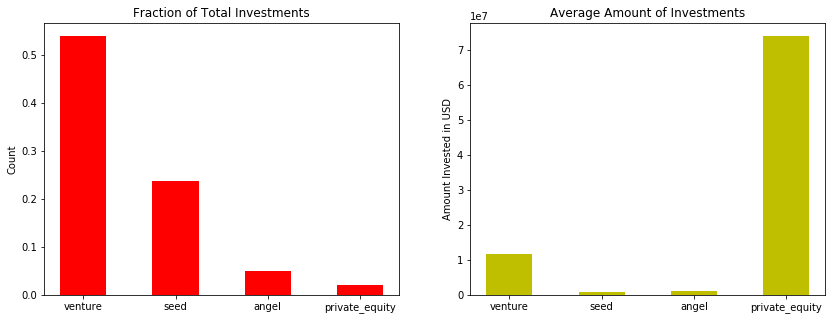

In [761]:
plt.figure(figsize= (14,5))
ax = plt.subplot(121)
x = np.arange(0,len(investmentTypes))
ax.bar(x, fraction_investments, width=0.5, color='r', align='center')
plt.xticks(x,investmentTypes)
plt.title('Fraction of Total Investments')
plt.ylabel('Count')
ax = plt.subplot(122)
ax.bar(x, average_amount_investments, width=0.5, color='y', align='center')
plt.xticks(x,investmentTypes)
plt.title('Average Amount of Investments')
plt.ylabel('Amount Invested in USD')
plt.show()

___Based on the above plots we can infer following things:___ <br><br>
__-> Venture is the most common type of investment__ <br>
__-> The most representative amount / the average amount of Venture type falls in the range of 5 to 15 Million USD__ <br>

## Plot 2

__Plot showing the top 9 countries against the total amount of investments of funding type Venture__

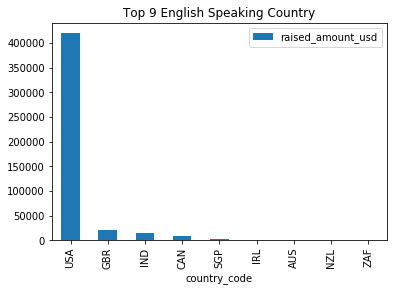

In [762]:
# A plot showing the top 9 countries against the total amount of investments of funding type Venture. 
top9.plot.bar(title='Top 9 English Speaking Country')

___Above plot shows USA, GBR and IND are the top three countries with highest total amount of investments___

## Plot 3

___Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for the chosen investment type Venture___

In [763]:
datadf = master_frame[(master_frame.raised_amount_usd >=5) & (master_frame.raised_amount_usd <=15)]

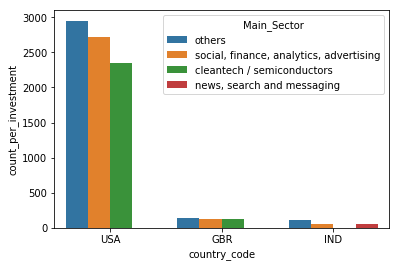

In [764]:
# Number of investments in the top 3 sectors of the top 3 countries
data = datadf.groupby(['country_code','Main_Sector'],as_index= False).raised_amount_usd.count().sort_values(by=['country_code', 'raised_amount_usd'], ascending=False).reset_index(drop = True).iloc[[0,1,2,16,17,18,8,9,10]].reset_index(drop= True).rename(columns={'raised_amount_usd': 'count_per_investment'})
sns.barplot(x ='country_code',y = 'count_per_investment',hue = 'Main_Sector',data = data)
